# Tutorial: optimal binning 2D with binary target

As usual, let's load a well-known dataset from the UCI repository and transform the data into a ``pandas.DataFrame``.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

We choose two variables to discretize and the binary target.

In [3]:
variable1 = "mean radius"
variable2 = "worst concavity"
x = df[variable1].values
y = df[variable2].values
z = data.target

Import and instantiate an ``OptimalBinning2D`` object class. We pass the variable names (coordinates x and y), and a solver, in this case, we choose the constraint programming solver.

In [4]:
from optbinning import OptimalBinning2D

In [5]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2, solver="cp")

We fit the optimal binning object with arrays ``x``, ``y``, and ``z``.

In [6]:
optb.fit(x, y, z)

OptimalBinning2D(name_x='mean radius', name_y='worst concavity')

Similar to other OptBinning classes, you can inspect the attributes ``status`` and ``splits``. In this case, the splits shown are actually the bins, but the ``splits`` name is used to maintain API homogeneity.

In [7]:
optb.status

'OPTIMAL'

In [8]:
optb.splits

([[-inf, 13.704999923706055],
  [13.704999923706055, 15.045000076293945],
  [15.045000076293945, 16.925000190734863],
  [16.925000190734863, inf],
  [-inf, 13.09499979019165],
  [13.09499979019165, 13.704999923706055],
  [15.045000076293945, 16.925000190734863],
  [13.09499979019165, 13.704999923706055],
  [13.704999923706055, 15.045000076293945],
  [15.045000076293945, 16.925000190734863],
  [13.09499979019165, 13.704999923706055],
  [13.704999923706055, 15.045000076293945],
  [15.045000076293945, inf],
  [-inf, 13.09499979019165],
  [13.09499979019165, 13.704999923706055],
  [13.704999923706055, 15.045000076293945]],
 [[-inf, 0.20795000344514847],
  [-inf, 0.2604999989271164],
  [-inf, 0.20795000344514847],
  [-inf, 0.31530000269412994],
  [0.20795000344514847, 0.37815000116825104],
  [0.20795000344514847, 0.2604999989271164],
  [0.20795000344514847, 0.2604999989271164],
  [0.2604999989271164, 0.31530000269412994],
  [0.2604999989271164, 0.31530000269412994],
  [0.2604999989271164, 0

#### The binning table

The binning table follows the same structure as the unidimensional binning, except for having two Bin columns, one for each variable (coordinate). The option ``show_bin_xy=True`` in method ``build`` combines both columns to obtain a single Bin column.

In [9]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13.70)","(-inf, 0.21)",219,0.384886,1,218,0.995434,-4.863346,2.946834,0.199430
1,"[13.70, 15.05)","(-inf, 0.26)",45,0.079086,1,44,0.977778,-3.263040,0.386776,0.034251
2,"[15.05, 16.93)","(-inf, 0.21)",8,0.014060,2,6,0.750000,-0.577463,0.004257,0.000525
3,"[16.93, inf)","(-inf, 0.32)",21,0.036907,20,1,0.047619,3.516882,0.321930,0.027320
4,"(-inf, 13.09)","[0.21, 0.38)",48,0.084359,1,47,0.979167,-3.328998,0.422569,0.037010
5,"[13.09, 13.70)","[0.21, 0.26)",6,0.010545,1,5,0.833333,-1.088288,0.010109,0.001205
6,"[15.05, 16.93)","[0.21, 0.26)",6,0.010545,4,2,0.333333,1.214297,0.016108,0.001898
7,"[13.09, 13.70)","[0.26, 0.32)",4,0.007030,1,3,0.750000,-0.577463,0.002129,0.000262
8,"[13.70, 15.05)","[0.26, 0.32)",9,0.015817,5,4,0.444444,0.744293,0.009215,0.001126
9,"[15.05, 16.93)","[0.26, 0.32)",8,0.014060,7,1,0.125000,2.467060,0.074549,0.007501


In [10]:
optb.binning_table.build(show_bin_xy=True)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13.70) $\cup$ (-inf, 0.21)",219,0.384886,1,218,0.995434,-4.863346,2.946834,0.199430
1,"[13.70, 15.05) $\cup$ (-inf, 0.26)",45,0.079086,1,44,0.977778,-3.263040,0.386776,0.034251
2,"[15.05, 16.93) $\cup$ (-inf, 0.21)",8,0.014060,2,6,0.750000,-0.577463,0.004257,0.000525
3,"[16.93, inf) $\cup$ (-inf, 0.32)",21,0.036907,20,1,0.047619,3.516882,0.321930,0.027320
4,"(-inf, 13.09) $\cup$ [0.21, 0.38)",48,0.084359,1,47,0.979167,-3.328998,0.422569,0.037010
5,"[13.09, 13.70) $\cup$ [0.21, 0.26)",6,0.010545,1,5,0.833333,-1.088288,0.010109,0.001205
6,"[15.05, 16.93) $\cup$ [0.21, 0.26)",6,0.010545,4,2,0.333333,1.214297,0.016108,0.001898
7,"[13.09, 13.70) $\cup$ [0.26, 0.32)",4,0.007030,1,3,0.750000,-0.577463,0.002129,0.000262
8,"[13.70, 15.05) $\cup$ [0.26, 0.32)",9,0.015817,5,4,0.444444,0.744293,0.009215,0.001126
9,"[15.05, 16.93) $\cup$ [0.26, 0.32)",8,0.014060,7,1,0.125000,2.467060,0.074549,0.007501


You can use the method ``plot`` to visualize the histogram 2D and WoE or event rate curve. Note that the Bin ID corresponds to the binning table index. These are the key points to correctly interpret the plots belows:

- Bins can only be rectangles. If a bin is composed by $m$ squares, the Bin ID is shown $m$ times.
- The upper left plot shows the WoE/event rate on the x-axis; the bin paths left-right.
- The lower right plot shows the WoE/event rate on the y-axis; the bin paths top-down.

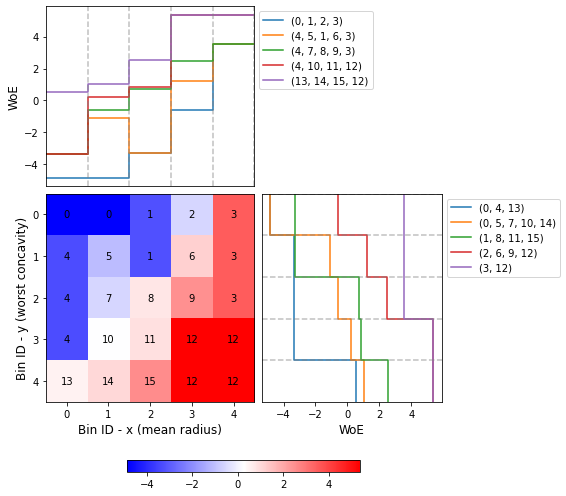

In [11]:
optb.binning_table.plot(metric="woe")

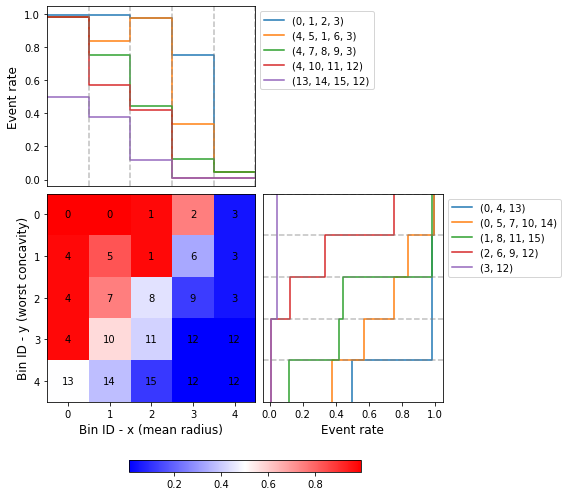

In [12]:
optb.binning_table.plot(metric="event_rate")

##### Event rate / WoE transformation

Now that we have checked the binned data, we can transform our original data into WoE or event rate values. You can check the correctness of the transformation using pandas ``value_counts`` method, for instance. Note that both ``x`` and ``y`` are required, and a single array is returned with the transformation.

In [13]:
z_transform_woe = optb.transform(x, y, metric="woe")
pd.Series(z_transform_woe).value_counts()

-4.863346    219
 5.373180    129
-3.328998     48
-3.263040     45
 0.521150     22
 3.516882     21
 2.536053     17
 0.857622     12
-0.577463     12
 0.744293      9
 2.467060      8
 1.031975      8
 0.233467      7
-1.088288      6
 1.214297      6
dtype: int64

In [14]:
z_transform_event_rate = optb.transform(x, y, metric="event_rate")
pd.Series(z_transform_event_rate).value_counts()

0.995434    219
0.007752    129
0.979167     48
0.977778     45
0.500000     22
0.047619     21
0.117647     17
0.416667     12
0.750000     12
0.444444      9
0.125000      8
0.375000      8
0.571429      7
0.833333      6
0.333333      6
dtype: int64

In [15]:
z_transform_indices = optb.transform(x, y, metric="indices")
pd.Series(z_transform_indices).value_counts()

0     219
12    129
4      48
1      45
13     22
3      21
15     17
11     12
8       9
2       8
9       8
14      8
10      7
5       6
6       6
7       4
dtype: int64

If ``metric="bins"`` the bin ids are combined.

In [16]:
z_transform_bins = optb.transform(x, y, metric="bins")

In [17]:
pd.Series(z_transform_bins).value_counts()

(-inf, 13.70) $\cup$ (-inf, 0.21)     219
[15.05, inf) $\cup$ [0.32, inf)       129
(-inf, 13.09) $\cup$ [0.21, 0.38)      48
[13.70, 15.05) $\cup$ (-inf, 0.26)     45
(-inf, 13.09) $\cup$ [0.38, inf)       22
[16.93, inf) $\cup$ (-inf, 0.32)       21
[13.70, 15.05) $\cup$ [0.38, inf)      17
[13.70, 15.05) $\cup$ [0.32, 0.38)     12
[13.70, 15.05) $\cup$ [0.26, 0.32)      9
[15.05, 16.93) $\cup$ [0.26, 0.32)      8
[13.09, 13.70) $\cup$ [0.38, inf)       8
[15.05, 16.93) $\cup$ (-inf, 0.21)      8
[13.09, 13.70) $\cup$ [0.32, 0.38)      7
[15.05, 16.93) $\cup$ [0.21, 0.26)      6
[13.09, 13.70) $\cup$ [0.21, 0.26)      6
[13.09, 13.70) $\cup$ [0.26, 0.32)      4
dtype: int64

#### Binning table statistical analysis

The ``analysis`` method performs a statistical analysis of the binning table, computing the statistics Gini index, Information Value (IV), Jensen-Shannon divergence, and the quality score. The report is the same that the one for unidimensional binning with a binary target. The main difference is that the significant tests for each bin are performed with respect to all its linked bins.

In [18]:
optb.binning_table.analysis()

------------------------------------------------
OptimalBinning: Binary Binning Table 2D Analysis
------------------------------------------------

  General metrics

    Gini index               0.96381005
    IV (Jeffrey)             7.63248244
    JS (Jensen-Shannon)      0.53356918
    Hellinger                0.66868014
    Triangular               1.62726969
    KS                       0.77651815
    HHI                      0.21836787
    HHI (normalized)         0.17238951
    Cramer's V               0.89619441
    Quality score            0.00000000

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     1.547799 2.134607e-01  0.832082 1.679183e-01
        0      4     1.401336 2.365000e-01  0.822661 1.773392e-01
        0      5    17.418530 2.998882e-05  0.977759 2.224079e-02
        1      2     6.599481 1.020085e-02  0.983958 1.604164e-02
        1      6    24.864348 6.150953e-07  0.999999 1.269024e-06
        1     

The ``OptimalBinning2D`` can print overview information about the options settings, problem statistics, and the solution of the computation. Use ``print_level=2``, to include the list of all options.

In [19]:
optb.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    name_x                       mean radius   * U
    name_y                   worst concavity   * U
    dtype_x                        numerical   * d
    dtype_y                        numerical   * d
    prebinning_method                   cart   * d
    strategy                            grid   * d
    solver                                cp   * d
    divergence                            iv   * d
    max_n_prebins_x                        5   * d
    max_n_prebins_y                        5   * d
    min_prebin_size_x                   0.05   * d
    min_prebin_size_y                   0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    min_bin_n_nonevent                    no   * d
    max_bin_n_nonev

#### Event rate / WoE monotonicity

The ``monotonic_trend_x`` and ``monotonic_trend_y`` options permit forcing a monotonic trend to the event rate curve on each axis. By default, both options are set to None. There are two options available: "ascending" and "descending". In this example, we force both trends to be "descending", and a minimum bin size of 0.025 (2.5%).

In [20]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2, monotonic_trend_x="descending",
                        monotonic_trend_y="descending", min_bin_size=0.025)
optb.fit(x, y, z)

OptimalBinning2D(min_bin_size=0.025, monotonic_trend_x='descending',
                 monotonic_trend_y='descending', name_x='mean radius',
                 name_y='worst concavity')

In [21]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13.70)","(-inf, 0.21)",219,0.384886,1,218,0.995434,-4.863346,2.946834,0.199430
1,"[13.70, 15.05)","(-inf, 0.21)",37,0.065026,1,36,0.972973,-3.062369,0.294365,0.026948
2,"[15.05, 16.93)","(-inf, 0.32)",22,0.038664,13,9,0.409091,0.888874,0.032098,0.003885
3,"[16.93, inf)","(-inf, 0.32)",21,0.036907,20,1,0.047619,3.516882,0.321930,0.027320
4,"(-inf, 13.09)","[0.21, 0.38)",48,0.084359,1,47,0.979167,-3.328998,0.422569,0.037010
5,"[13.09, 15.05)","[0.21, 0.32)",27,0.047452,7,20,0.740741,-0.528673,0.012161,0.001503
6,"[13.09, 15.05)","[0.32, 0.38)",19,0.033392,10,9,0.473684,0.626510,0.013758,0.001692
7,"[15.05, inf)","[0.32, inf)",129,0.226714,128,1,0.007752,5.373180,3.229133,0.201294
8,"(-inf, 13.70)","[0.38, inf)",30,0.052724,16,14,0.466667,0.654681,0.023736,0.002915
9,"[13.70, 15.05)","[0.38, inf)",17,0.029877,15,2,0.117647,2.536053,0.165230,0.016450


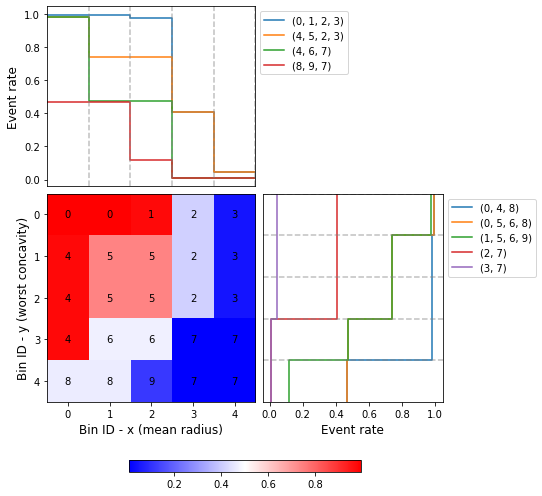

In [22]:
optb.binning_table.plot(metric="event_rate")

In [23]:
optb.binning_table.analysis()

------------------------------------------------
OptimalBinning: Binary Binning Table 2D Analysis
------------------------------------------------

  General metrics

    Gini index               0.95655621
    IV (Jeffrey)             7.46181417
    JS (Jensen-Shannon)      0.51844733
    Hellinger                0.65109672
    Triangular               1.57873476
    KS                       0.72434068
    HHI                      0.22077705
    HHI (normalized)         0.14993861
    Cramer's V               0.88274577
    Quality score            0.00000000

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     2.060028 1.512074e-01  0.858293 1.417071e-01
        0      4     1.401336 2.365000e-01  0.822661 1.773392e-01
        0      5    49.557596 1.926326e-12  1.000000 3.782008e-11
        1      2    24.238873 8.509727e-07  1.000000 9.439925e-09
        1      5     7.696840 5.531760e-03  0.998790 1.209527e-03
        2     

#### Reduction of dominating bins

To produce more homogeneous bins, the formulation includes a constraint to reduce the difference between the largest and smallest bin. The added regularization parameter ``gamma`` controls the importance of the reduction term. Larger values specify stronger regularization.

In [24]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2, gamma=600)

optb.fit(x, y, z)

OptimalBinning2D(gamma=600, name_x='mean radius', name_y='worst concavity')

In [25]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13.09)","(-inf, 0.21)",195,0.342707,1,194,0.994872,-4.746709,2.557054,0.176405
1,"[13.09, 16.93)","(-inf, 0.26)",89,0.156415,8,81,0.910112,-1.793858,0.339317,0.037510
2,"[16.93, inf)","(-inf, inf)",118,0.207381,117,1,0.008475,5.283323,2.900997,0.183436
3,"(-inf, 13.09)","[0.21, inf)",70,0.123023,12,58,0.828571,-1.054387,0.111619,0.013340
4,"[13.09, 16.93)","[0.26, inf)",97,0.170475,74,23,0.237113,1.689720,0.480947,0.053853
5,Special,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
6,Missing,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
Totals,,,569,1.000000,212,357,0.627417,,6.389933,0.464545


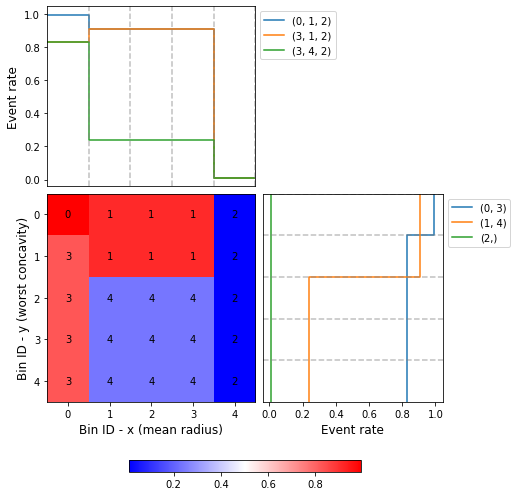

In [26]:
optb.binning_table.plot(metric="event_rate")

#### Missing data and special codes

For this example, let's load data from the FICO Explainable Machine Learning Challenge: https://community.fico.com/s/explainable-machine-learning-challenge

In [27]:
df = pd.read_csv("data/FICO_challenge/heloc_dataset_v1.csv", sep=",")

The data dictionary of this challenge includes three special values/codes:

* -9 No Bureau Record or No Investigation
* -8 No Usable/Valid Trades or Inquiries
* -7 Condition not Met (e.g. No Inquiries, No Delinquencies)

All three special codes are considered for both variables.

In [28]:
special_codes_x = [-9, -8, -7]
special_codes_y = [-9, -8, -7]

In [29]:
variable1 = "AverageMInFile"
variable2 = "MSinceOldestTradeOpen"
x = df[variable1].values
y = df[variable2].values
z = df.RiskPerformance.values

mask = z == "Bad"
z[mask] = 1
z[~mask] = 0
z = z.astype(int)

For the sake of completeness, we include a few missing values

In [30]:
idx = np.random.randint(0, len(x), 500)
x = x.astype(float)
x[idx] = np.nan

In [31]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        monotonic_trend_y="ascending",
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(monotonic_trend_y='ascending', name_x='AverageMInFile',
                 name_y='MSinceOldestTradeOpen', special_codes_x=[-9, -8, -7],
                 special_codes_y=[-9, -8, -7])

In [32]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.50)","(-inf, inf)",1556,0.148289,374,1182,0.759640,-1.063165,0.150230,0.017941
1,"[48.50, 64.50)","(-inf, 184.50)",1215,0.115791,480,735,0.604938,-0.338542,0.013050,0.001623
2,"[64.50, 81.50)","(-inf, inf)",2193,0.208996,1086,1107,0.504788,0.068390,0.000979,0.000122
3,"[81.50, 101.50)","(-inf, inf)",1957,0.186505,1118,839,0.428717,0.374629,0.026085,0.003242
4,"[101.50, inf)","(-inf, inf)",1898,0.180882,1205,693,0.365121,0.640748,0.072809,0.008949
5,"[48.50, 64.50)","[184.50, inf)",360,0.034309,140,220,0.611111,-0.364442,0.004472,0.000556
6,Special,Special,827,0.078814,375,452,0.546554,-0.099213,0.000773,0.000097
7,Missing,Missing,487,0.046412,239,248,0.509240,0.050578,0.000119,0.000015
Totals,,,10493,1.000000,5017,5476,0.521872,,0.268516,0.032545


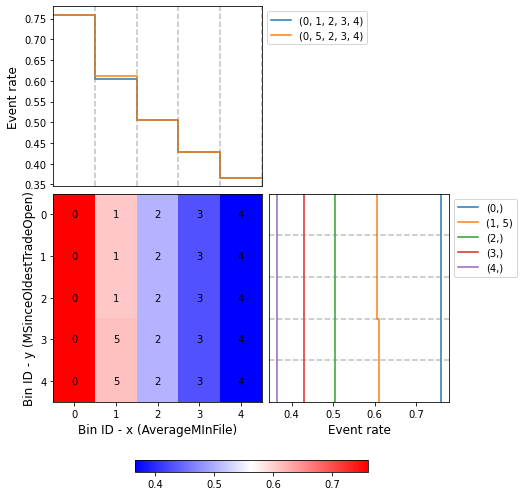

In [33]:
optb.binning_table.plot(metric="event_rate")

Note that the special and missing bins are not included in the plot above.

#### Strategy CART (Experimental)

In this last section, provide guidance to handle large grids. These large grids are generated when the parameters ``max_n_prebins_*`` increase (the default value is set to 5). The performance of the optimization solvers CP and MIP is instance dependent. Based on experiments, the CP solver tends to perform better on very large grids, but on small and medium sizes the MIP can be often faster.

##### 10 prebins (100 grid elements)

In [34]:
variable1 = "ExternalRiskEstimate"
variable2 = "AverageMInFile"
x = df[variable1].values
y = df[variable2].values

In [35]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="cp",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=10, max_n_prebins_y=10,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=10, max_n_prebins_y=10, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 special_codes_x=[-9, -8, -7], special_codes_y=[-9, -8, -7])

In [36]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63.50)","(-inf, 54.50)",749,0.071613,87,662,0.883845,-1.941530,0.201662,0.021871
1,"[63.50, 70.50)","(-inf, 54.50)",765,0.073143,187,578,0.755556,-1.040638,0.071263,0.008527
2,"[70.50, 78.50)","(-inf, 64.50)",815,0.077923,343,472,0.579141,-0.231421,0.004134,0.000516
3,"[78.50, 80.50)","(-inf, inf)",588,0.056220,405,183,0.311224,0.882229,0.041886,0.005072
4,"[80.50, inf)","(-inf, 74.50)",563,0.053829,405,158,0.280639,1.029120,0.053573,0.006416
5,"(-inf, 59.50)","[54.50, inf)",746,0.071326,131,615,0.824397,-1.458597,0.126107,0.014500
6,"[59.50, 67.50)","[54.50, 81.50)",828,0.079166,213,615,0.742754,-0.972502,0.068132,0.008196
7,"[67.50, 70.50)","[54.50, inf)",735,0.070274,309,426,0.579592,-0.233270,0.003787,0.000472
8,"[70.50, 75.50)","[64.50, inf)",1049,0.100296,596,453,0.431840,0.362176,0.013117,0.001631
9,"[75.50, 78.50)","[64.50, inf)",549,0.052491,372,177,0.322404,0.830572,0.034864,0.004237


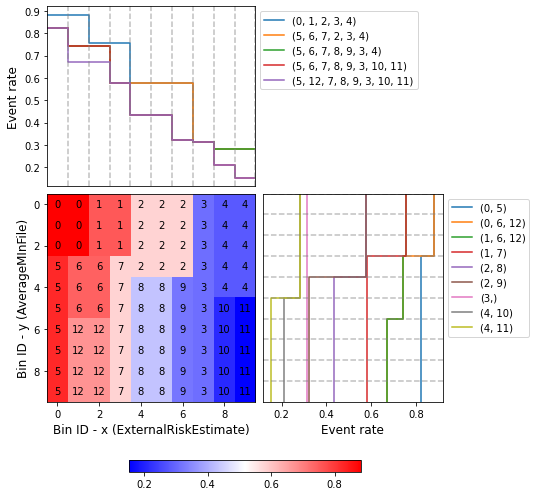

In [37]:
optb.binning_table.plot(metric="event_rate")

In [38]:
optb.information(print_level=1)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   100
    Number of refinements                844

  Solver statistics
    Type                                  cp
    Number of booleans                  2154
    Number of branches                 19433
    Number of conflicts                 8439
    Objective value                  1098271
    Best objective bound             1098271

  Timing
    Total time                         11.72 sec
    Pre-processing                      0.00 sec   (  0.04%)
    Pre-binning                         0.02 sec   (  0.14%)
    Solver                             11.69 sec   ( 99.75%)
      model generation                  2.96 sec   ( 25.30%)
      optimizer                         8.73 sec   ( 74.70%)
    Post-processing                   

In [39]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="mip",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=10, max_n_prebins_y=10,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=10, max_n_prebins_y=10, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 solver='mip', special_codes_x=[-9, -8, -7],
                 special_codes_y=[-9, -8, -7])

In [40]:
optb.information(print_level=1)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   100
    Number of refinements                844

  Solver statistics
    Type                                 mip
    Number of variables                 1596
    Number of constraints               2181
    Objective value                   1.0983
    Best objective bound              1.0983

  Timing
    Total time                          5.78 sec
    Pre-processing                      0.00 sec   (  0.06%)
    Pre-binning                         0.02 sec   (  0.28%)
    Solver                              5.75 sec   ( 99.53%)
    Post-processing                     0.00 sec   (  0.03%)



In this case, the MIP solver reduces the CPU time by 40%. The default strategy to perform refinements is set to ``strategy="grid"``. Alternatively, when setting ``strategy="cart"``, a decision tree is used to reduce the space search by merging not relevant pre-bins. This procedure accelerates the solution of the optimization problem at the expense of worsening the total IV.

In [41]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="cp", strategy="cart",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=10, max_n_prebins_y=10,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=10, max_n_prebins_y=10, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 special_codes_x=[-9, -8, -7], special_codes_y=[-9, -8, -7],
                 strategy='cart')

In [42]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63.50)","(-inf, 54.50)",749,0.071613,87,662,0.883845,-1.941530,0.201662,0.021871
1,"[63.50, 73.50)","(-inf, 48.50)",768,0.073430,181,587,0.764323,-1.088700,0.077656,0.009254
2,"[73.50, 80.50)","(-inf, 64.50)",620,0.059279,324,296,0.477419,0.178212,0.001885,0.000235
3,"[80.50, inf)","(-inf, 74.50)",563,0.053829,405,158,0.280639,1.029120,0.053573,0.006416
4,"[63.50, 73.50)","[48.50, 64.50)",661,0.063199,235,426,0.644478,-0.507026,0.015736,0.001946
5,"(-inf, 59.50)","[54.50, inf)",746,0.071326,131,615,0.824397,-1.458597,0.126107,0.014500
6,"[59.50, 63.50)","[54.50, inf)",683,0.065303,176,507,0.742313,-0.970199,0.055955,0.006732
7,"[63.50, 70.50)","[64.50, inf)",1314,0.125633,488,826,0.628615,-0.438452,0.023549,0.002920
8,"[70.50, 75.50)","[64.50, inf)",1049,0.100296,596,453,0.431840,0.362176,0.013117,0.001631
9,"[75.50, 80.50)","[64.50, inf)",960,0.091787,665,295,0.307292,0.900639,0.071115,0.008601


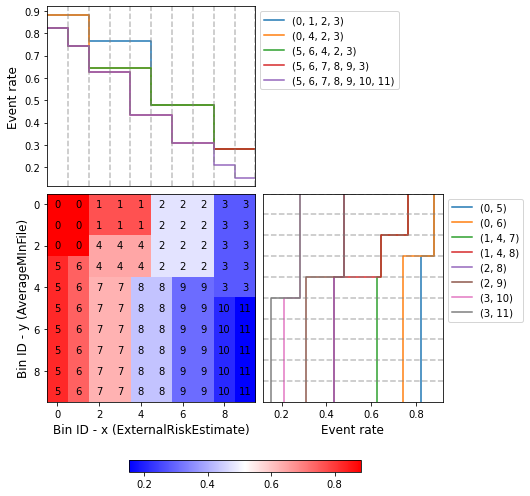

In [43]:
optb.binning_table.plot(metric="event_rate")

In [44]:
optb.information(print_level=1)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   100
    Number of refinements               2802

  Solver statistics
    Type                                  cp
    Number of booleans                   145
    Number of branches                  1962
    Number of conflicts                  594
    Objective value                  1094546
    Best objective bound             1094546

  Timing
    Total time                          0.57 sec
    Pre-processing                      0.00 sec   (  0.40%)
    Pre-binning                         0.02 sec   (  4.13%)
    Solver                              0.55 sec   ( 95.19%)
      model generation                  0.38 sec   ( 68.68%)
      optimizer                         0.17 sec   ( 31.32%)
    Post-processing                   

We get a 21x speedup at the cost of -0.34% reduction in IV.

##### 20 prebins (400 grid elements)

In [45]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="cp",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=20, max_n_prebins_y=20,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=20, max_n_prebins_y=20, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 special_codes_x=[-9, -8, -7], special_codes_y=[-9, -8, -7])

In [46]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63.50)","(-inf, 54.50)",749,0.071613,87,662,0.883845,-1.941530,0.201662,0.021871
1,"[63.50, 75.50)","(-inf, 41.50)",571,0.054594,141,430,0.753065,-1.027198,0.051944,0.006222
2,"[75.50, 87.50)","(-inf, 64.50)",698,0.066737,413,285,0.408309,0.458786,0.013944,0.001728
3,"[87.50, inf)","(-inf, inf)",616,0.058897,524,92,0.149351,1.827531,0.160726,0.017692
4,"[63.50, 67.50)","[41.50, 74.50)",550,0.052586,154,396,0.720000,-0.856634,0.035757,0.004338
5,"[67.50, 73.50)","[41.50, 64.50)",548,0.052395,194,354,0.645985,-0.513611,0.013378,0.001654
6,"[73.50, 75.50)","[41.50, inf)",552,0.052778,314,238,0.431159,0.364950,0.007008,0.000871
7,"(-inf, 59.50)","[54.50, inf)",746,0.071326,131,615,0.824397,-1.458597,0.126107,0.014500
8,"[59.50, 63.50)","[54.50, inf)",683,0.065303,176,507,0.742313,-0.970199,0.055955,0.006732
9,"[67.50, 70.50)","[64.50, inf)",599,0.057271,256,343,0.572621,-0.204725,0.002381,0.000297


In [47]:
optb.information()

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   168
    Number of refinements               2524

  Solver statistics
    Type                                  cp
    Number of booleans                  5616
    Number of branches                 25469
    Number of conflicts                13345
    Objective value                  1102734
    Best objective bound             1102734

  Timing
    Total time                         41.69 sec
    Pre-processing                      0.00 sec   (  0.01%)
    Pre-binning                         0.02 sec   (  0.04%)
    Solver                             41.64 sec   ( 99.88%)
      model generation                 16.30 sec   ( 39.13%)
      optimizer                        25.35 sec   ( 60.87%)
    Post-processing                   

In [48]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="mip",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=20, max_n_prebins_y=20,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=20, max_n_prebins_y=20, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 solver='mip', special_codes_x=[-9, -8, -7],
                 special_codes_y=[-9, -8, -7])

In [49]:
optb.information()

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   168
    Number of refinements               2524

  Solver statistics
    Type                                 mip
    Number of variables                 4098
    Number of constraints               5666
    Objective value                   1.1027
    Best objective bound              1.1027

  Timing
    Total time                         51.33 sec
    Pre-processing                      0.00 sec   (  0.01%)
    Pre-binning                         0.02 sec   (  0.04%)
    Solver                             51.28 sec   ( 99.91%)
    Post-processing                     0.00 sec   (  0.01%)



In [50]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        solver="cp", strategy="cart",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="descending",
                        max_n_prebins_x=20, max_n_prebins_y=20,
                        min_bin_size=0.05,
                        special_codes_x=special_codes_x,
                        special_codes_y=special_codes_y)
optb.fit(x, y, z)

OptimalBinning2D(max_n_prebins_x=20, max_n_prebins_y=20, min_bin_size=0.05,
                 monotonic_trend_x='descending', monotonic_trend_y='descending',
                 name_x='ExternalRiskEstimate', name_y='AverageMInFile',
                 special_codes_x=[-9, -8, -7], special_codes_y=[-9, -8, -7],
                 strategy='cart')

In [51]:
optb.binning_table.build()

,Bin x,Bin y,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63.50)","(-inf, 54.50)",749,0.071613,87,662,0.883845,-1.941530,0.201662,0.021871
1,"[63.50, 67.50)","(-inf, 69.50)",713,0.068171,182,531,0.744741,-0.982928,0.059831,0.007192
2,"[67.50, 73.50)","(-inf, 64.50)",811,0.077541,263,548,0.675709,-0.646294,0.030883,0.003795
3,"[73.50, 80.50)","(-inf, 64.50)",620,0.059279,324,296,0.477419,0.178212,0.001885,0.000235
4,"[80.50, 84.50)","(-inf, 97.50)",726,0.069414,533,193,0.265840,1.103659,0.078631,0.009359
5,"[84.50, inf)","(-inf, 97.50)",615,0.058801,511,104,0.169106,1.679806,0.139674,0.015658
6,"(-inf, 59.50)","[54.50, inf)",746,0.071326,131,615,0.824397,-1.458597,0.126107,0.014500
7,"[59.50, 63.50)","[54.50, inf)",683,0.065303,176,507,0.742313,-0.970199,0.055955,0.006732
8,"[67.50, 70.50)","[64.50, inf)",599,0.057271,256,343,0.572621,-0.204725,0.002381,0.000297
9,"[70.50, 75.50)","[64.50, inf)",1049,0.100296,596,453,0.431840,0.362176,0.013117,0.001631


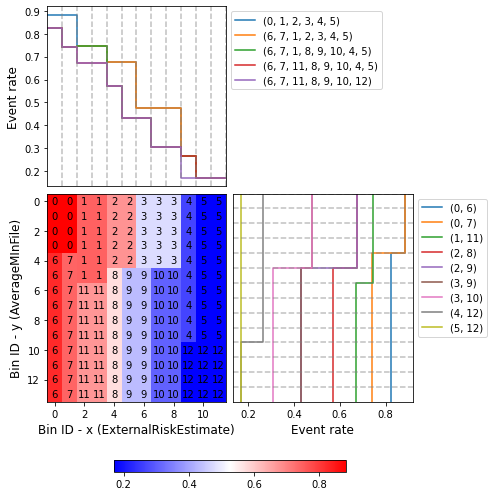

In [52]:
optb.binning_table.plot(metric="event_rate")

In [53]:
optb.information()

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Name    : ExternalRiskEstimate-AverageMInFile
  Status  : OPTIMAL                         

  Pre-binning statistics
    Number of pre-bins                   168
    Number of refinements               8046

  Solver statistics
    Type                                  cp
    Number of booleans                    51
    Number of branches                   127
    Number of conflicts                    5
    Objective value                  1086067
    Best objective bound             1086067

  Timing
    Total time                          0.74 sec
    Pre-processing                      0.00 sec   (  0.53%)
    Pre-binning                         0.02 sec   (  3.00%)
    Solver                              0.71 sec   ( 96.12%)
      model generation                  0.69 sec   ( 97.08%)
      optimizer                         0.02 sec   (  2.92%)
    Post-processing                   

We get a 58x speedup at the cost of -1.51% reduction in IV. The following table summarizes performance improvements:

| prebins  | CP + grid | MIP + grid | CP + cart  | Speedup CP | Speed MIP |
|----------|-----------|------------|------------|------------|-----------|
| 10 (100) | 11.40 s   | 5.97 s     | 0.69 s     | 17x        | 9x        |
| 20 (400) | 52.76 s   | 52.93 s    | 0.74 s     | 71x        | 72x       |

#### Categorical variables

The combination of categorical-categorical and numerical-categorical are supported since version 0.15.0.

In [54]:
df = pd.read_csv("data/kaggle/HomeCreditDefaultRisk/application_train.csv",
                 engine='c')

Case categorical-categorical

In [55]:
variable1 = "ORGANIZATION_TYPE"
variable2 = "NAME_INCOME_TYPE"
x = df[variable1].values
y = df[variable2].values
z = df["TARGET"].values

In [56]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        dtype_x="categorical", dtype_y="categorical",
                        max_n_bins=10)
optb.fit(x, y, z)

OptimalBinning2D(dtype_x='categorical', dtype_y='categorical', max_n_bins=10,
                 name_x='ORGANIZATION_TYPE', name_y='NAME_INCOME_TYPE')

In [57]:
optb.binning_table.build(show_bin_xy=True)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,['Trade: type 4' 'Industry: type 12' 'Transpor...,55390,0.180124,52408,2982,0.053836,0.433980,0.028327,0.003513
1,['Trade: type 4' 'Industry: type 12' 'Transpor...,11442,0.037208,10891,551,0.048156,0.551472,0.009006,0.001112
2,['Hotel' 'Industry: type 10' 'Medicine' 'Servi...,23267,0.075662,21865,1402,0.060257,0.314502,0.006564,0.000817
3,['Housing' 'Industry: type 7' 'Business Entity...,38863,0.126379,35966,2897,0.074544,0.086413,0.000910,0.000114
4,['Security' 'Industry: type 4' 'Self-employed'...,19748,0.064219,17989,1759,0.089072,-0.107471,0.000776,0.000097
5,['Trade: type 4' 'Industry: type 12' 'Transpor...,10624,0.034548,9981,643,0.060523,0.309808,0.002914,0.000363
6,['Hotel' 'Industry: type 10' 'Medicine' 'Servi...,35568,0.115664,32792,2776,0.078048,0.036688,0.000153,0.000019
7,['Housing' 'Industry: type 7' 'Business Entity...,69102,0.224714,62197,6905,0.099925,-0.234425,0.013626,0.001699
8,['Security' 'Industry: type 4' 'Self-employed'...,31207,0.101483,27795,3412,0.109334,-0.334928,0.013102,0.001630
9,['Agriculture' 'Realtor' 'Industry: type 3' 'I...,12300,0.039999,10802,1498,0.121789,-0.456885,0.010111,0.001253


In [58]:
optb.splits

([array(['Trade: type 4', 'Industry: type 12', 'Transport: type 1',
         'Trade: type 6', 'Security Ministries', 'University', 'Police',
         'Military', 'Bank', 'XNA', 'Culture', 'Insurance', 'Religion',
         'School', 'Trade: type 5', 'Hotel', 'Industry: type 10',
         'Medicine', 'Services', 'Electricity', 'Industry: type 9',
         'Industry: type 5', 'Government', 'Trade: type 2', 'Kindergarten',
         'Emergency', 'Industry: type 6', 'Industry: type 2', 'Telecom',
         'Other', 'Transport: type 2', 'Legal Services', 'Housing',
         'Industry: type 7', 'Business Entity Type 1', 'Advertising',
         'Postal', 'Business Entity Type 2', 'Industry: type 11',
         'Trade: type 1', 'Mobile', 'Transport: type 4',
         'Business Entity Type 3', 'Trade: type 7', 'Security',
         'Industry: type 4', 'Self-employed', 'Trade: type 3',
         'Agriculture', 'Realtor', 'Industry: type 3', 'Industry: type 1',
         'Cleaning', 'Construction', 'Res

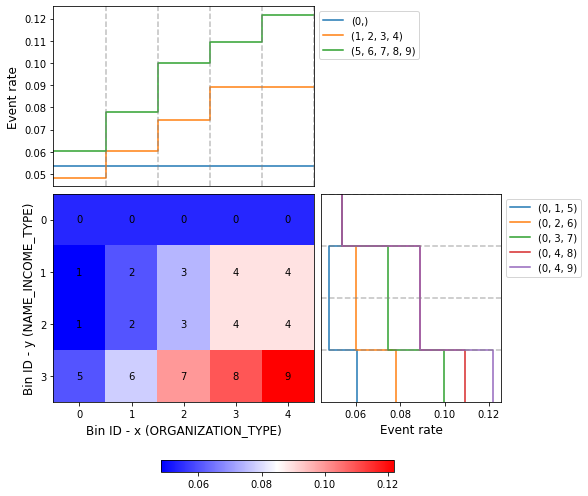

In [59]:
optb.binning_table.plot(metric="event_rate")

In [60]:
z_transform_woe = optb.transform(x, y, metric="woe")
pd.Series(z_transform_woe).value_counts()

-0.234425    69102
 0.433980    55390
 0.086413    38863
 0.036688    35568
-0.334928    31207
 0.314502    23267
-0.107471    19748
-0.456885    12300
 0.551472    11442
 0.309808    10624
dtype: int64

In [61]:
z_transform_indices = optb.transform(x, y, metric="indices")
pd.Series(z_transform_indices).value_counts()

7    69102
0    55390
3    38863
6    35568
8    31207
2    23267
4    19748
9    12300
1    11442
5    10624
dtype: int64

Case numerical-categorical

In [62]:
variable1 = "AMT_INCOME_TOTAL"
variable2 = "NAME_INCOME_TYPE"
x = df[variable1].values
y = df[variable2].values

In [63]:
optb = OptimalBinning2D(name_x=variable1, name_y=variable2,
                        dtype_x="numerical", dtype_y="categorical",
                        monotonic_trend_x="descending",
                        monotonic_trend_y="ascending")
optb.fit(x, y, z)

OptimalBinning2D(dtype_y='categorical', monotonic_trend_x='descending',
                 monotonic_trend_y='ascending', name_x='AMT_INCOME_TOTAL',
                 name_y='NAME_INCOME_TYPE')

In [64]:
optb.binning_table.build(show_bin_xy=True)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 184511.25) $\cup$ ['Businessman' 'Stude...",45526,0.148047,43045,2481,0.054496,0.421099,0.022037,0.002734
1,"[184511.25, 232717.50) $\cup$ ['Businessman' '...",5400,0.017560,5121,279,0.051667,0.477408,0.003283,0.000407
2,"[232717.50, 310950.00) $\cup$ ['Businessman' '...",4955,0.016113,4723,232,0.046821,0.580977,0.004277,0.000527
3,"[310950.00, inf) $\cup$ ['Businessman' 'Studen...",3723,0.012107,3570,153,0.041096,0.717397,0.004638,0.000568
4,"(-inf, 76477.50) $\cup$ ['State servant']",1299,0.004224,1206,93,0.071594,0.129979,0.000068,0.000008
5,"[76477.50, 184511.25) $\cup$ ['State servant']",12623,0.041049,11820,803,0.063614,0.256708,0.002430,0.000303
6,"[184511.25, 232717.50) $\cup$ ['State servant']",3567,0.011600,3377,190,0.053266,0.445233,0.001911,0.000237
7,"(-inf, 76477.50) $\cup$ ['Commercial associate']",1917,0.006234,1734,183,0.095462,-0.183786,0.000227,0.000028
8,"[76477.50, 184511.25) $\cup$ ['Commercial asso...",39005,0.126841,35809,3196,0.081938,-0.016186,0.000033,0.000004
9,"[184511.25, 232717.50) $\cup$ ['Commercial ass...",12996,0.042262,12079,917,0.070560,0.145631,0.000843,0.000105


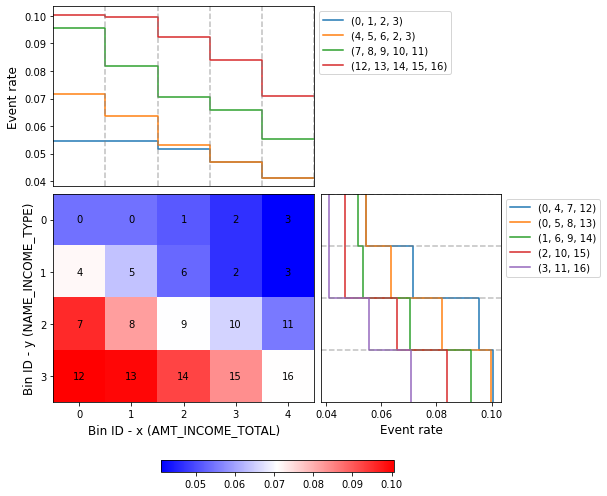

In [65]:
optb.binning_table.plot(metric="event_rate")

In [66]:
z_transform_woe = optb.transform(x, y, metric="woe")
pd.Series(z_transform_woe).value_counts()

-0.231336    104920
 0.421099     45526
-0.016186     39005
-0.148658     22580
 0.145631     12996
 0.256708     12623
-0.041118     11666
-0.240459     10879
 0.404370      9609
 0.141849      8756
 0.221233      8090
 0.477408      5400
 0.580977      4955
 0.717397      3723
 0.445233      3567
-0.183786      1917
 0.129979      1299
dtype: int64

In [67]:
z_transform_indices = optb.transform(x, y, metric="indices")
pd.Series(z_transform_indices).value_counts()

13    104920
0      45526
8      39005
14     22580
9      12996
5      12623
15     11666
12     10879
11      9609
16      8756
10      8090
1       5400
2       4955
3       3723
6       3567
7       1917
4       1299
dtype: int64